In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Q1.Load the dataset into python environment and make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv(r"C:\Jerza\Data Science Project\Data Set\titanic_dataset.csv",index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Checking the basic details of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
#Fill in all the missing values present in all the columns in the dataset

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

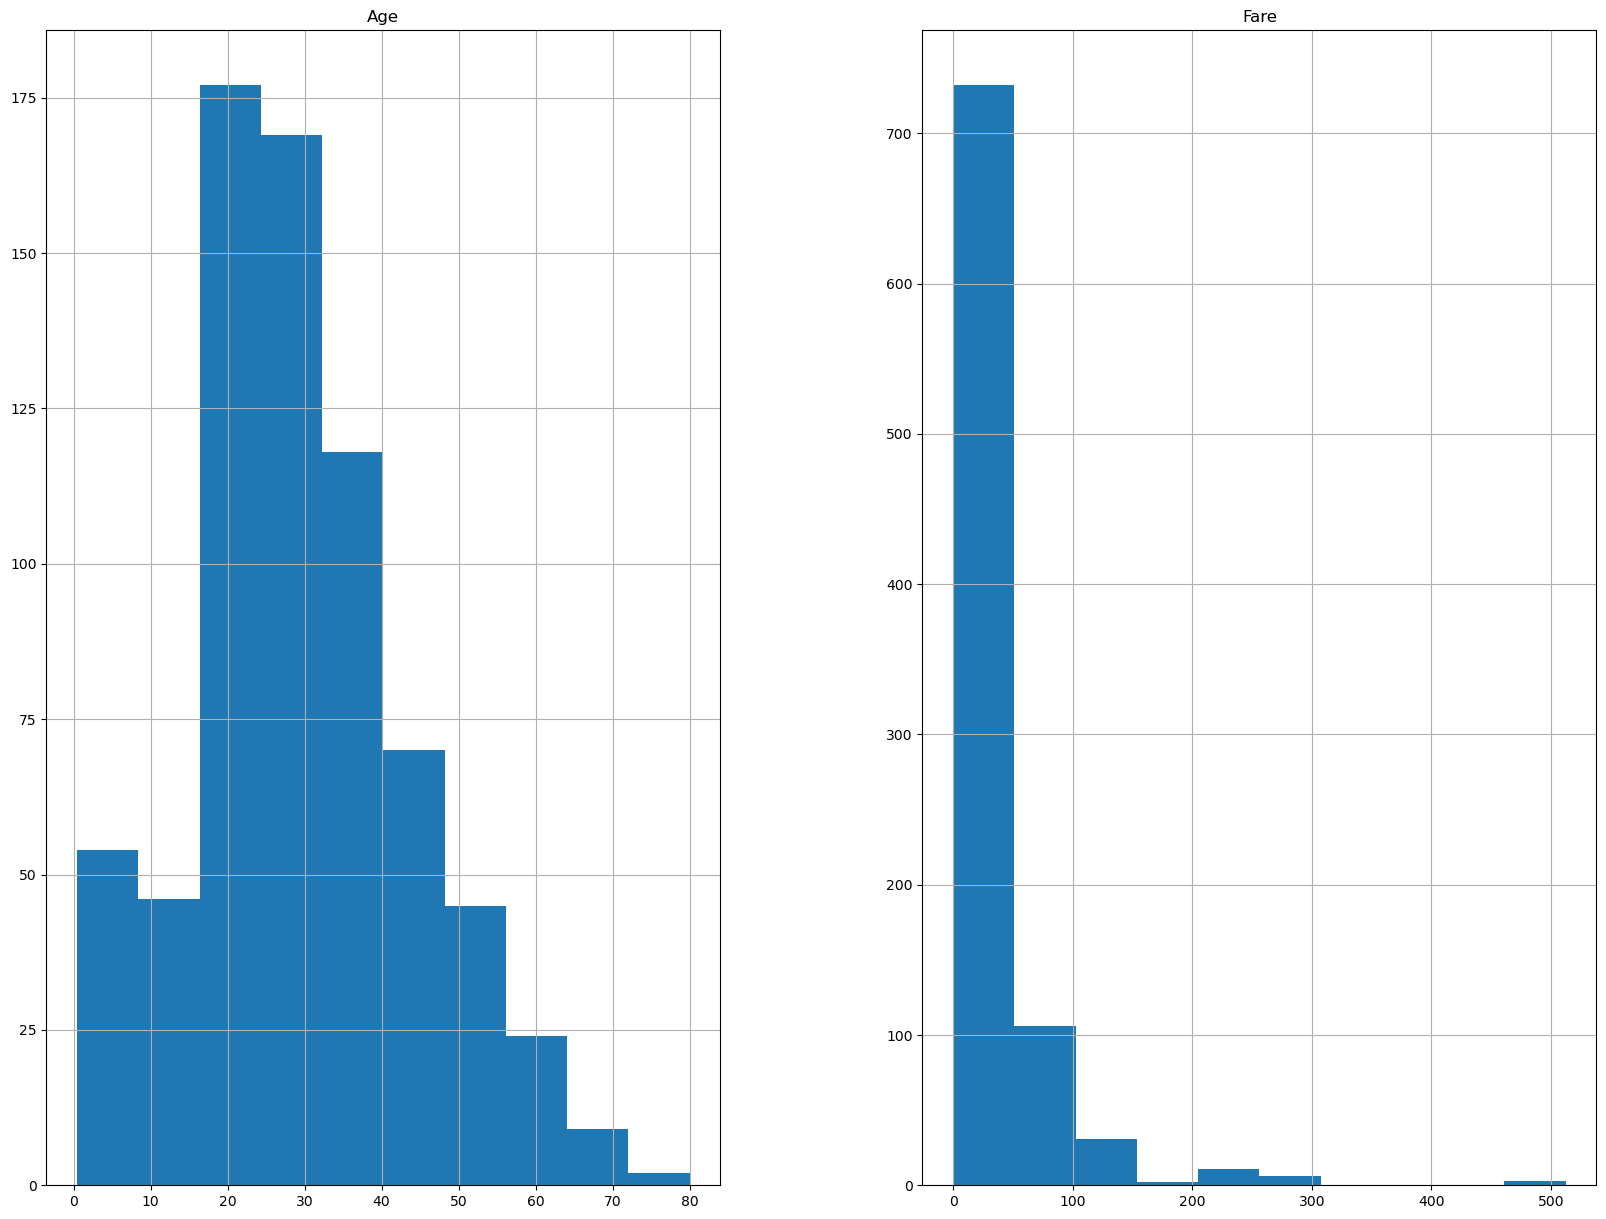

In [12]:
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [27]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Fare']=data['Fare'].fillna(data['Fare'].median())


In [28]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [29]:
# Check and handle outliers in at least 3 columns in the dataset

In [31]:
num_columns=['Age','Fare','Parch']

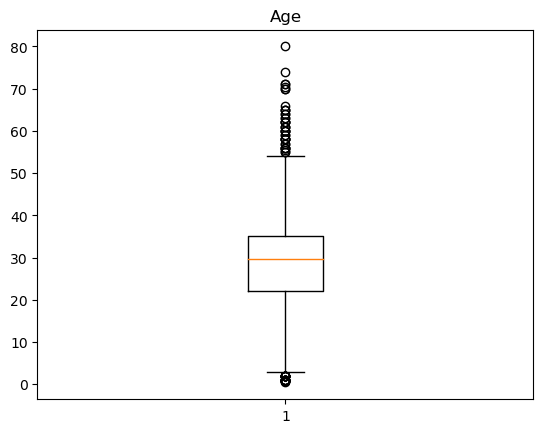

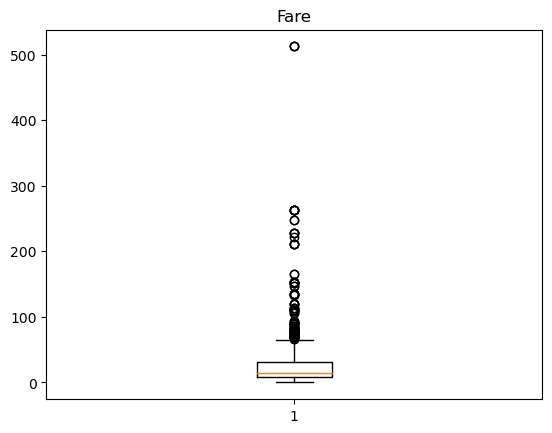

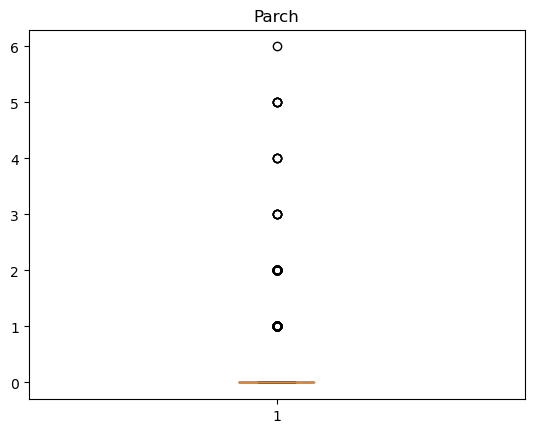

In [33]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i);

In [35]:
Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')

In [36]:
print('Q1 is:',Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 22.0
Q2 is: 29.69911764705882
Q3 is: 35.0


In [37]:
IQR=Q3-Q1
print(IQR)

13.0


In [40]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower value:",low_lim)
print("Upper Value:",up_lim)

lower value: 2.5
Upper Value: 54.5


In [41]:
outliers=[]

for x in data['Age']:
    if((x<low_lim)or(x>up_lim)):
        outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [42]:
data['Age']=data['Age'].clip(lower=low_lim,upper=up_lim)

In [43]:
outliers=[]

for x in data['Age']:
    if((x<low_lim)or(x>up_lim)):
        outliers.append(x)
print(outliers)

[]


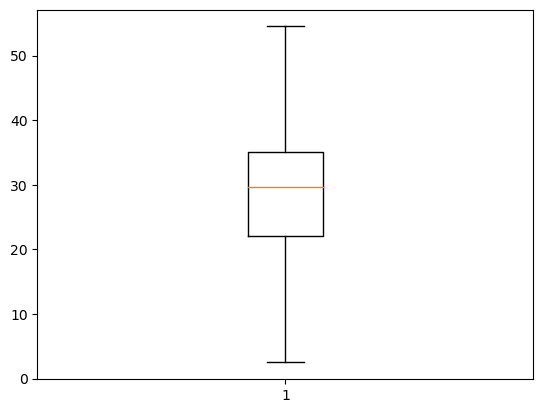

In [44]:
plt.boxplot(data['Age'])
plt.show();

In [ ]:
# MIn and Max Scaling on the feature set("Survived" as target)

In [22]:
X=data[['Age','Fare','Parch']]


<function matplotlib.pyplot.show(close=None, block=None)>

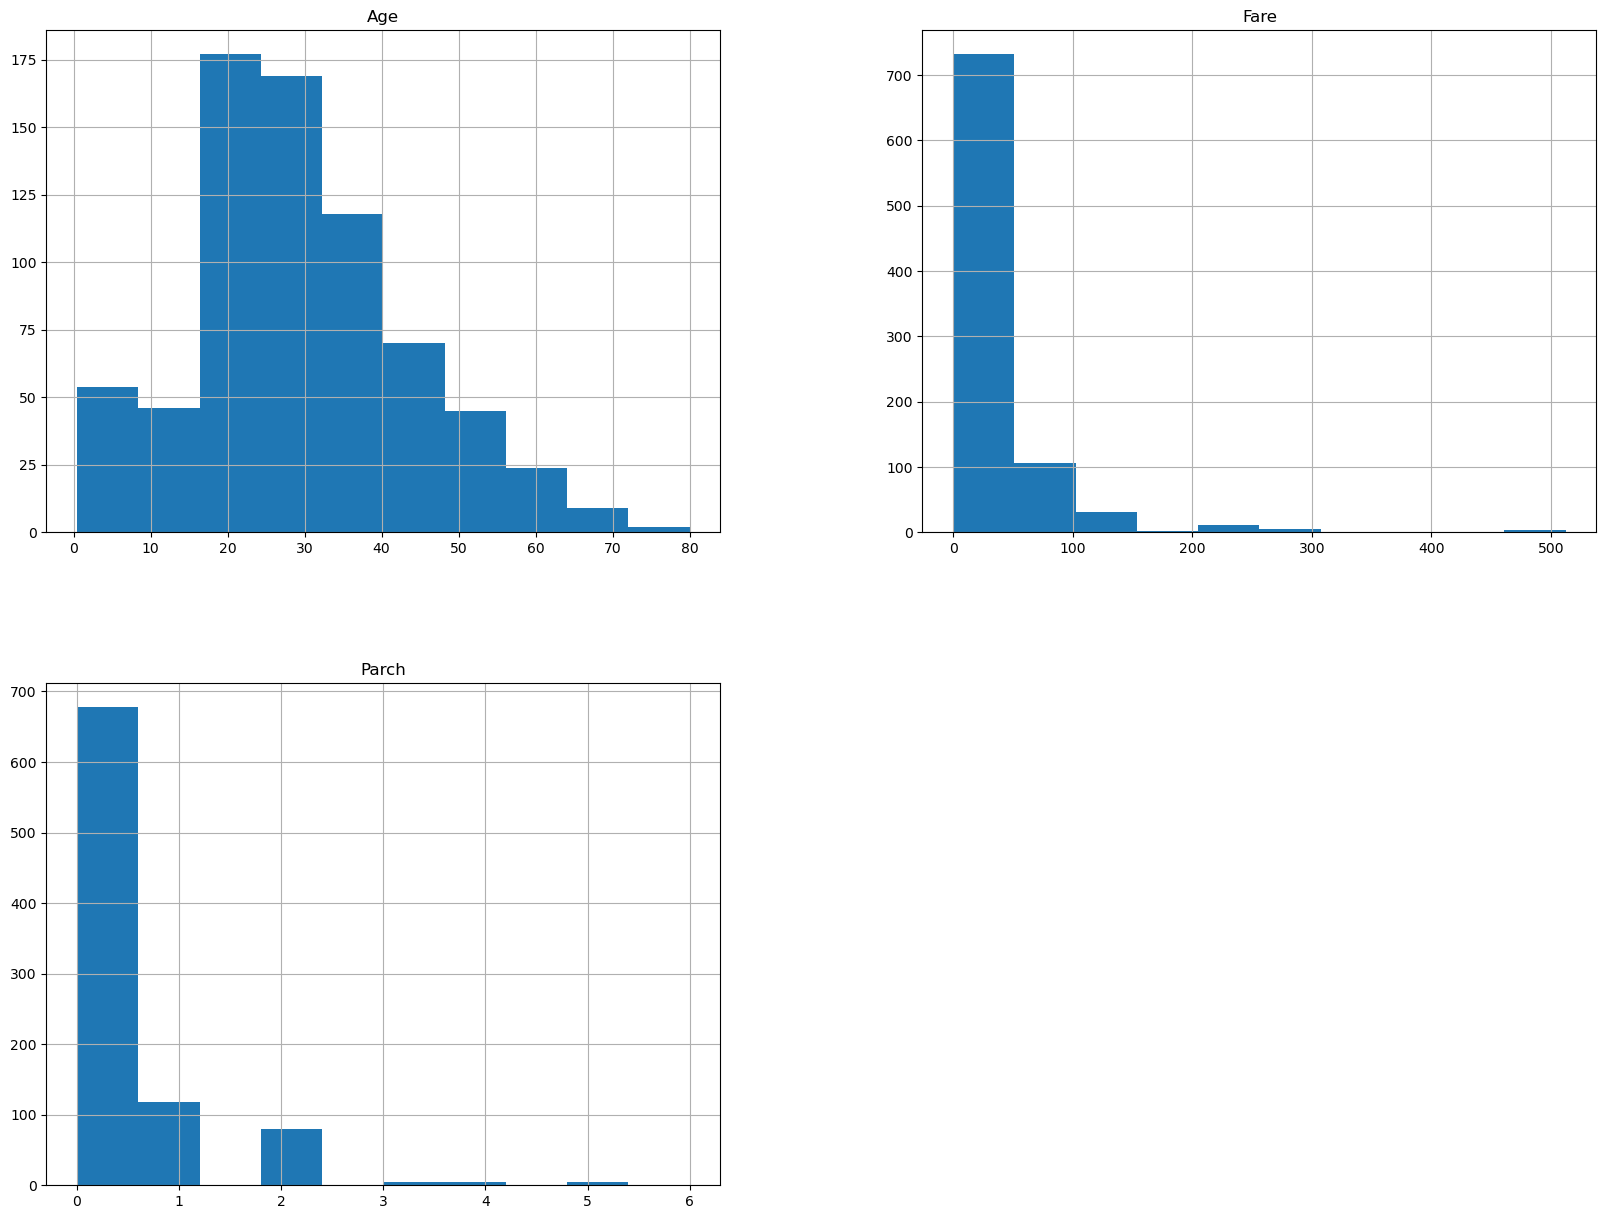

In [23]:
X.hist(figsize=(20,15))
plt.show

In [24]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)

In [25]:
X_mm.describe()

,0,1,2
count,714.000000,891.000000,891.000000
mean,0.367921,0.062858,0.063599
std,0.182540,0.096995,0.134343
min,0.000000,0.000000,0.000000
25%,0.247612,0.015440,0.000000
50%,0.346569,0.028213,0.000000
75%,0.472229,0.060508,0.000000
max,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

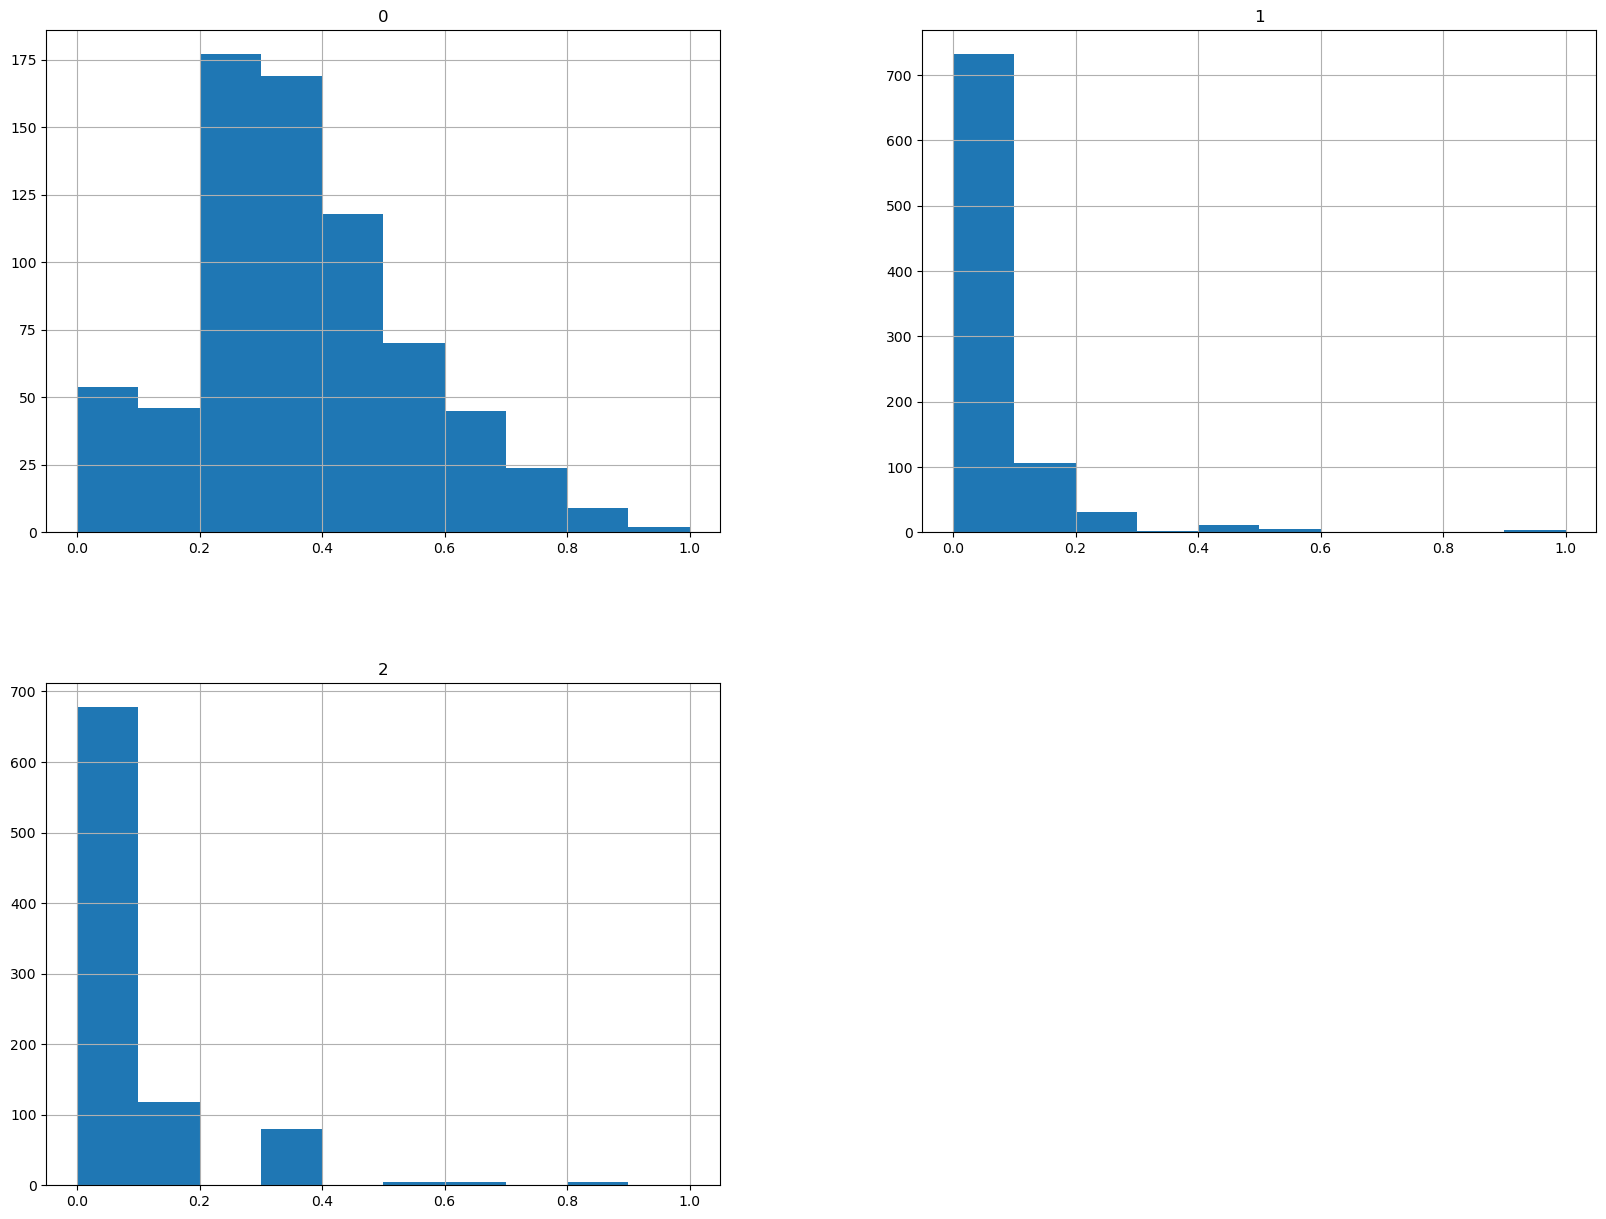

In [26]:
X_mm.hist(figsize=(20,15))
plt.show

In [ ]:
#Analysis: Datas are scaled between 0 and 1